# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [233]:
import numpy as np

sales = np.array([3505, 2400, 3027, 2798, 3700, 3250, 2689])

def funstats(data):
    """take array or list, and return its mean, variance, and std"""

    m = 0  #init mean
    v = 0
    s = 0  
    n = len(data)
    for x in data: 
        m += x
    m = m/n
    for x in data:
        v += (x - m)**2
    v = v / (n-1)
    s = np.sqrt(v)
    return m, v, s


result = sales.mean(), sales.var(ddof=1), sales.std(ddof=1)     #numpy for checking 

print(result)
print(funstats(sales))

## lol TDD assertions
result == funstats(sales)



(3052.714285714286, 214387.90476190473, 463.0204150595357)
(3052.714285714286, 214387.90476190473, 463.0204150595357)


True

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [246]:
import pandas as pd
cust = np.array( [127, 80, 105, 92, 120, 115, 93] )
s_c_cov = np.cov(cust,sales, ddof=1)
print('numpy', s_c_cov[1][0])    #via numpy
##
df = pd.DataFrame([cust, sales] )#, columns=['cust','sales'])
df =df.T
df.cov() == np.cov(sales,cust, ddof=1)     #close enough to be true in 3decimal places
#n.cov(sales,cust, ddof=1)
print('pandas', df.cov()[1][0])   #via pandas


numpy 7604.357142857142
pandas 7604.357142857142


## 1.3 

Find the standard deviation of customers who entered the store last week. 

Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (*You may use library functions to check your work.*)

In [253]:
_,_,cust_std = funstats(cust)   #std cust
_,_,sales_std = funstats(sales) #std sales

corr =  s_c_cov[1][0]

r = corr / (cust_std * sales_std)
print(np.corrcoef(cust,sales)[1][0] == r)
print(r)                                 #correlation coef betw cust and sales




True
0.9628339778148909


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [260]:
t = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
t.drop('Unnamed: 0',axis=1,inplace=True)
numerical_cols = t.describe().columns
covariance_matrix = t[numerical_cols].cov()
correl_matrix = t[numerical_cols].corr()
print(correl_matrix)
covariance_matrix
##TODO fix

                    pclass  survived       age     sibsp     parch      fare  \
pclass            1.000000 -0.312469 -0.366370  0.060832  0.018322 -0.558629   
survived         -0.312469  1.000000 -0.050199 -0.027825  0.082660  0.244265   
age              -0.366370 -0.050199  1.000000 -0.190747 -0.130872  0.171892   
sibsp             0.060832 -0.027825 -0.190747  1.000000  0.373587  0.160238   
parch             0.018322  0.082660 -0.130872  0.373587  1.000000  0.221539   
fare             -0.558629  0.244265  0.171892  0.160238  0.221539  1.000000   
body             -0.034642       NaN  0.059059 -0.099961  0.051099 -0.043110   
has_cabin_number -0.713857  0.302250  0.271887 -0.009064  0.036806  0.507253   

                      body  has_cabin_number  
pclass           -0.034642         -0.713857  
survived               NaN          0.302250  
age               0.059059          0.271887  
sibsp            -0.099961         -0.009064  
parch             0.051099          0.036806

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

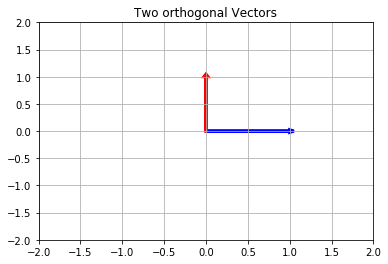

In [122]:
#orthogoal means perpendicular
import matplotlib.pyplot as plt
plt.xlim(-2,2)          
plt.ylim(-2,2)

a = [1,0] 
b = [0,1]

# Plot Vectors
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Two orthogonal Vectors")
plt.grid(True)
plt.show()


## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [128]:
a =np.array([-5, 3,7])
b= np.array([6, -8, 2])
# are a and b orthogonal?

assert np.dot(a,b) == 0, " a and b are NOT orthogonal"  #just for fun throws an error if the expression is false

AssertionError:  a and b are NOT orthoonal

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [276]:
c = np.array([2,-15,6,20])

#not sure if this is a trick but im reading it as "what is the square of the norm of c?" whihc since the norm
# of c is the square root of the sum of squares, therefore the answer is the sum of squares of c:
x = np.linalg.norm(c) #l2 norm
print('sum of squares',x**2)

print('dot prod', np.dot(c,c))    #dot product

#
print('matrix product of c with its transpose', np.matmul( c.T, c))


sum of squares 665.0
dot prod 665
matrix product of c with its transpose 665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

## Here you go:

\begin{align}
d =  7 * \begin{bmatrix} 1 \\ 0  \end{bmatrix} + 12 * \begin{bmatrix} 0 \\ 1 \end{bmatrix}
\qquad
f =  2 * \begin{bmatrix} 1 \\ 0 \\ 0  \end{bmatrix} + 11 * \begin{bmatrix} 0 \\ 1 \\ 0  \end{bmatrix} -  8 * \begin{bmatrix} 0  \\ 0 \\ 1  \end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [278]:
f = np.array([[4,12,11,9,2]])
f = f.transpose()
print(f)

[[ 4]
 [12]
 [11]
 [ 9]
 [ 2]]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

[0.5 0.5 0.5]
[ True  True  True]
[ True  True  True]


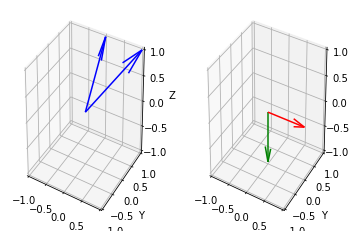

In [179]:
from mpl_toolkits.mplot3d import Axes3D

v= np.array([.5, .5 , .5])
origin = [0,0,0] # origin 
vprime = v * 2
print (v)
print(v - (.5 * vprime) == 0)
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.quiver(*origin, *vector, length=1, color='blue')
ax.quiver(*origin, *vprime, length=1, color='blue')


ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax2 = fig.add_subplot(122, projection='3d')

a = np.array([0,0,-1])
b = np.array([1,0,0])

ax2.quiver(*origin, *a, length=1, color='green')
ax2.quiver(*origin, *b, length=1, color='red')

ax2.set_xlim([-1, 1])
ax2.set_ylim([-1, 1])
ax2.set_zlim([-1, 1])
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

print(v - (.5 * vprime) == 0)  ##verifiy linear dependence



# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

[-0.56 -1.12]


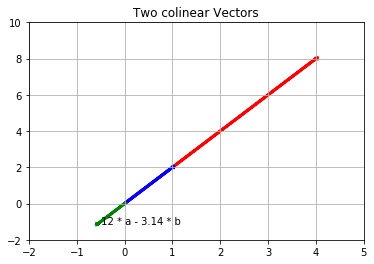

In [279]:
# the span of vectors g,h is the set of all vectors that can be expressed as linear combinations of the two. 
# we can see that since h = 2*g, they are lie on the same line. Thus the span of g,h is the line through [1,2]
plt.xlim(-2,5)          
plt.ylim(-2,10)

a = np.array([1,2])
b = np.array([4,8])
c = 12 * a - 3.14 * b  # c is a linear combination of a and b as shown in the plot, it is co-linear with a,b
print(c)
# Plot Vectors
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, *c, linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.text(*c, s=' 12 * a - 3.14 * b')


plt.title("Two colinear Vectors")
plt.grid(True)
plt.show()


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [212]:
#compose to matrix
#take rank will tell you # of lin indep vectors..
# 

l = np.array([1,2,3])
m = np.array([-1,0,7])
n = np.array([4,8,2])
m= np.array([l,m,n])
#rowspace = span_of_rows(m)
#rank(m) == dim(rowpsace)

print(' the span of {l,m,n] is the',np.linalg.matrix_rank(m),'-dimensional space R3')

 the span of {l,m,n] is the 3 -dimensional space R3


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



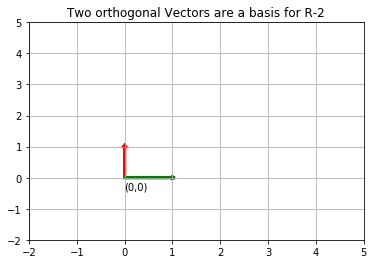

In [220]:
# given a space 
plt.xlim(-2,5)          
plt.ylim(-2,5)

a = np.array([0,1]) #orthonormal bases for R-2
b = np.array([1,0])
# Plot Vectors
plt.arrow(0,0, *a, linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, *b, linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.text(x=0,y=-.4,s="(0,0)")


plt.title("Two orthogonal Vectors are a basis for R-2")
plt.grid(True)
plt.show()


## 6.2 What does it mean to form a basis?

The basis for a vector space V is a collection of linearly independent vectors that span V.That is, all points in the space can be reached by some linear combination of the collection of vectors. 

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [230]:
p= np.array([[1,2,3], [(-1), 0, 7], [4, 8, 2]])
print(p)
print("The rank of P is", np.linalg.matrix_rank(p))

[[ 1  2  3]
 [-1  0  7]
 [ 4  8  2]]
The rank of P is 3


## 7.2 What does the rank of a matrix tell us?

The rank of a matrix is the dimension of the span of the rows of the matrix (row space)
Basically what lowest number dimensions of the space we are dealing with not sure what the question above means?
# Markdown
## LateX $\alpha^2$
Markdown LateX: $\alpha$


# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

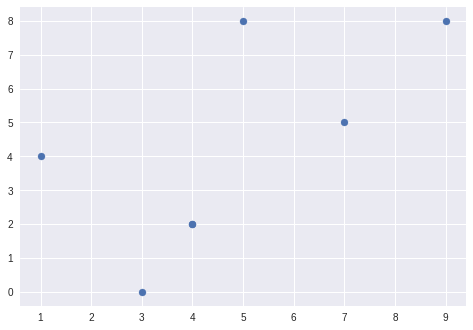

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()